In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# # GPU가 있다면...
# if len(gpus) > 0:
#     try :
#         for gpu in gpus :
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e :
#         print(e)

최소 제곱법
- 선형회귀는 정확한 예측선을 찾는 방법이다.
- 예측선은 직선을 의미하며 y=ax+b라는 기본 공식을 사용한다.
- 이 때 a는 기울기를 의미하며 b는 y 절편을 의미한다.
- 즉 선형회귀는 정호가한 에측선을 찾기 위해 최적의 기울기 y와 절편을 찾는 것을 의미한다.
- 이 때, 최소 제곱법이 제공하는 공식을 이용하면 기울기와 절편을 계산할 수 있다.

In [3]:
# 학습 데이터
공부한시간 = [2, 4, 6 ,8]
성적 = [81, 93, 91, 97]

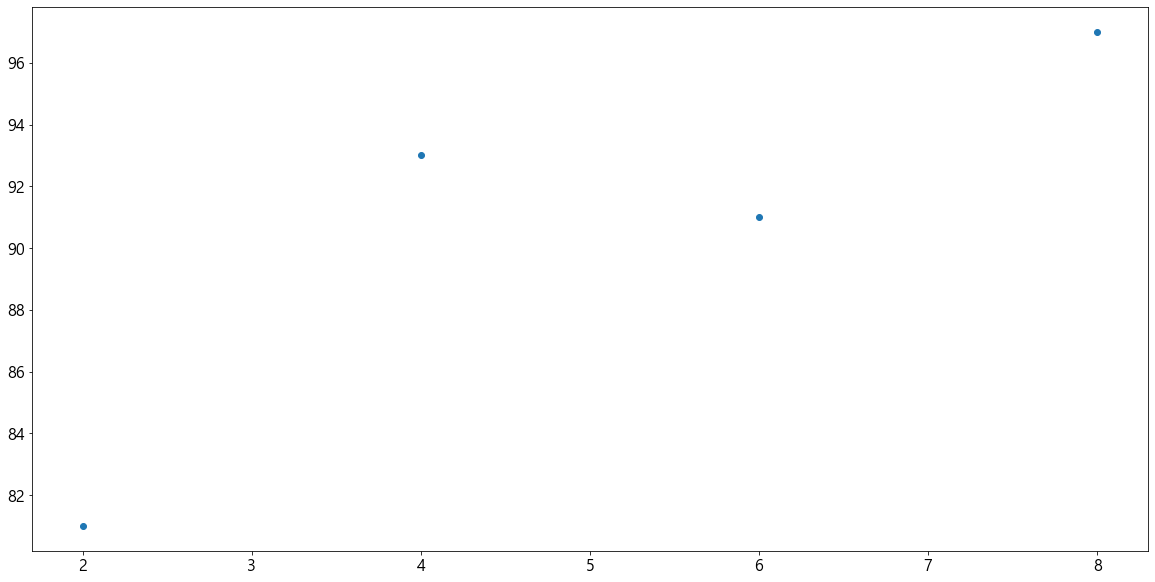

In [5]:
plt.scatter(공부한시간, 성적)
plt.show()

In [ ]:
# 계산을 용이하기 하기 위해 ndarray를 생성한다.
a1 = np.array(공부한시간)
a2 = np.array(성적)

In [8]:
# x의 평균과 y의 평균을 구한다.
x_mean = a1.mean()
y_mean = a2.mean()

print(x_mean)
print(y_mean)

5.0
90.5


In [34]:
# 기울기 계산을 위한 분모를 구한다.
a100 = 0

for a200 in 공부한시간:
    a100 = a100 + ((a200-x_mean)**2)
    
print(a100)

20.0


In [37]:
# 기울기 게산을 위한 분자를 구한다.
a300 = 0
for idx in range(len(공부한시간)):
    a300 = a300+((공부한시간[idx]-x_mean)*(성적[idx]-y_mean))
print(a300)

46.0


In [39]:
# 분자를 분모로 나눠서 기울기를 구한다.
기울기 = a300 / a100
기울기

2.3

In [40]:
# y절편을 구한다.
y절편 = y_mean - (x_mean * 기울기)
y절편

79.0

In [45]:
# 값을 에측해서 실제 값과 비교해본다.
예측성적 = []
for v1 in 공부한시간 :
    a1 = (기울기* v1) + y절편
    예측성적.append(a1)
    
예측성적

[83.6, 88.2, 92.8, 97.4]

In [42]:
성적

[81, 93, 91, 97]

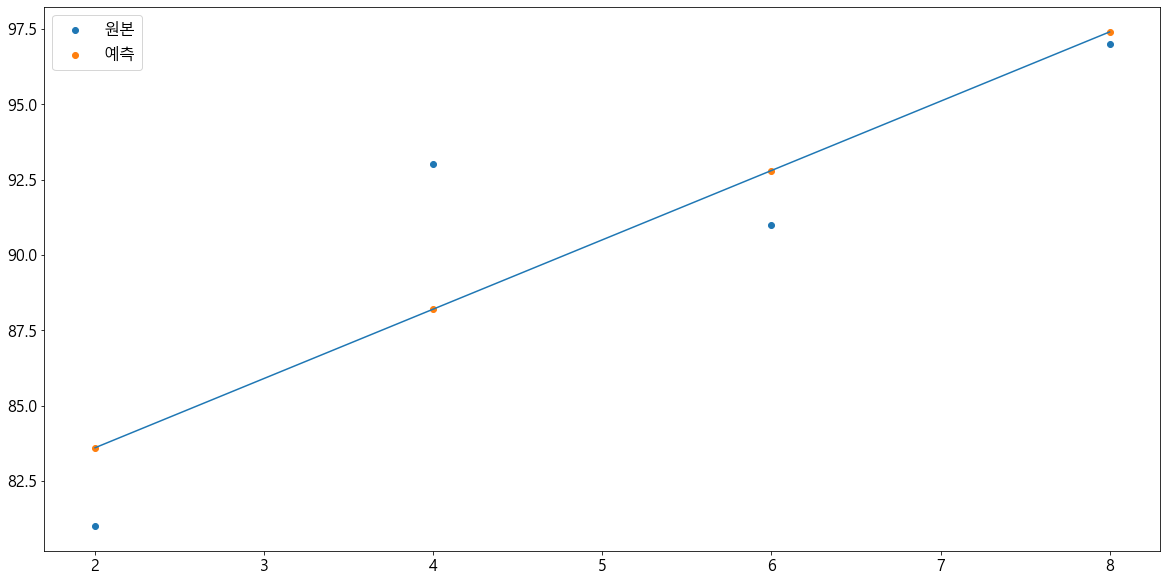

In [50]:
# 시각화 한다
plt.scatter(공부한시간, 성적, label='원본')
plt.scatter(공부한시간, 예측성적, label='예측')
plt.plot(공부한시간, 예측성적)
plt.legend()
plt.show()

In [48]:
# 10시간 공부한 경우
pred = (기울기 * 10) + y절편
pred

102.0